In [3]:
pip install nbformat


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\kiahm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/88.3 kB ? eta -:--:--
   ---------------------------------------- 88.3/88.3 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/209.0 kB ? eta -:--:--
   --------------------------------------- 209.0/209.0 kB 13.3 MB/s eta 0:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               2000 non-null   object
 1   review             2000 non-null   object
 2   rating             2000 non-null   int64 
 3   isEdited           2000 non-null   bool  
 4   userName           2000 non-null   object
 5   title              2000 non-null   object
 6   developerResponse  15 non-null     object
dtypes: bool(1), int64(1), object(5)
memory usage: 95.8+ KB
None
           rating
count  2000.00000
mean      3.88950
std       1.44891
min       1.00000
25%       3.00000
50%       5.00000
75%       5.00000
max       5.00000
date                 object
review               object
rating                int64
isEdited               bool
userName             object
title                object
developerResponse    object
dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiahm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


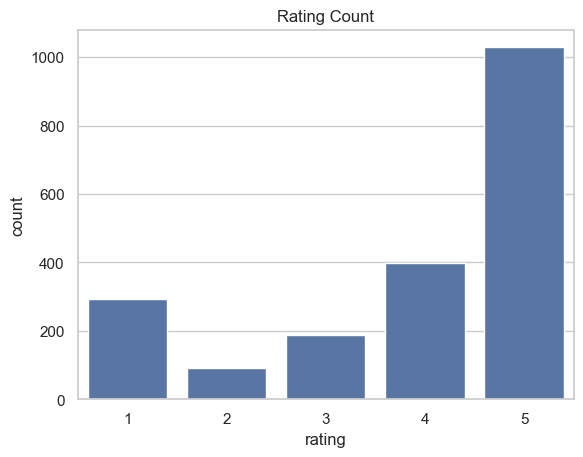

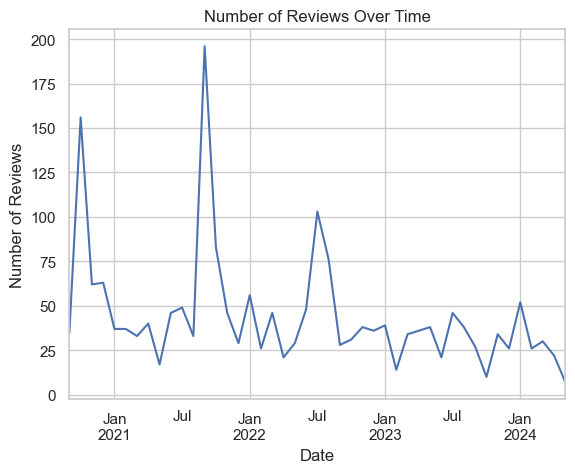

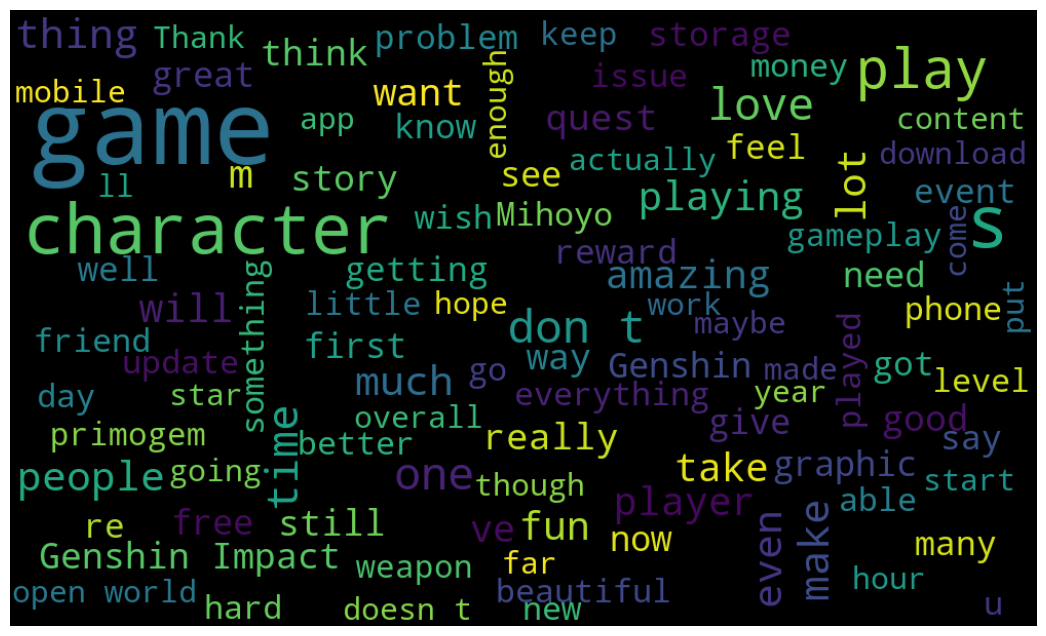

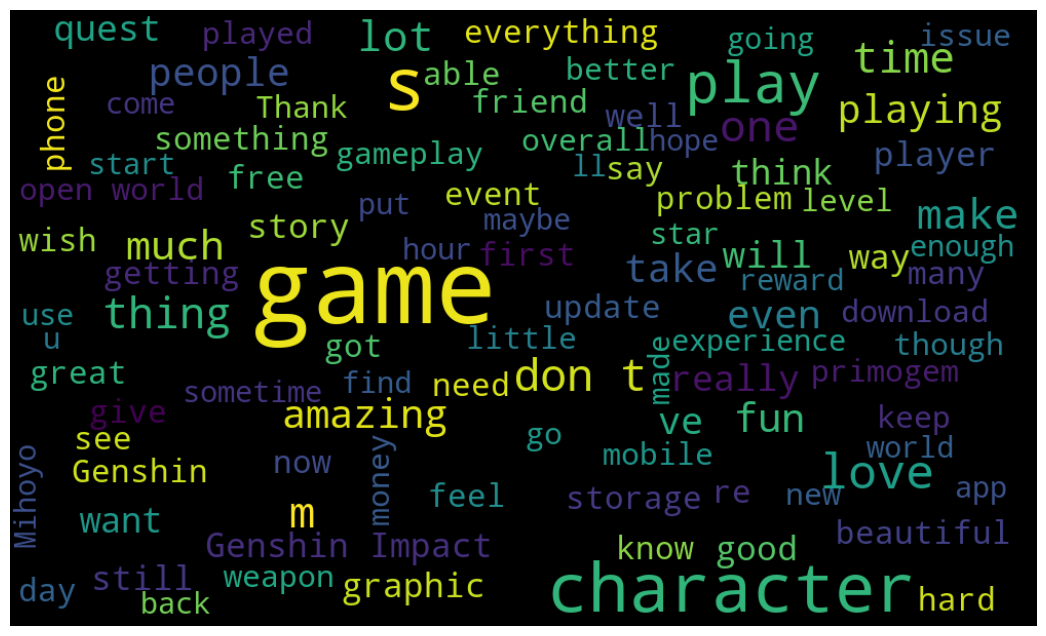

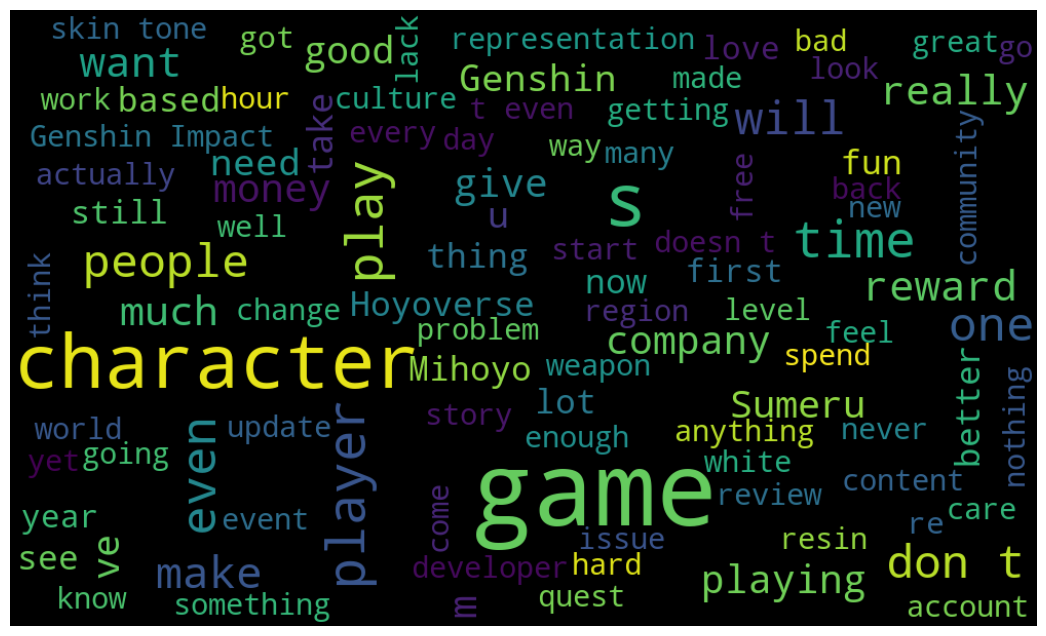

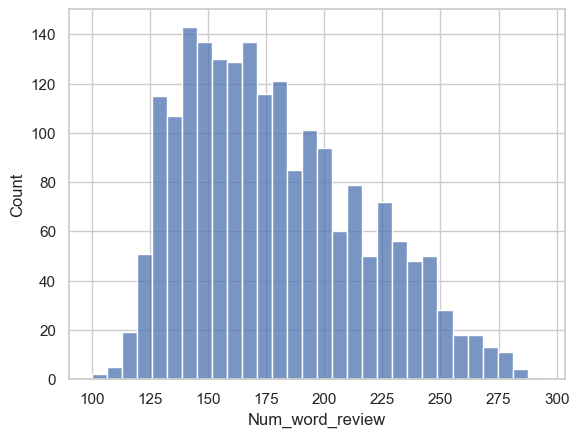

C:\Users\kiahm\AppData\Local\Temp\ipykernel_21220\3260963195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="Common_words", data=temp, palette=sns.color_palette("Set2"))
C:\Users\kiahm\AppData\Local\Temp\ipykernel_21220\3260963195.py:4: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="count", y="Common_words", data=temp, palette=sns.color_palette("Set2"))


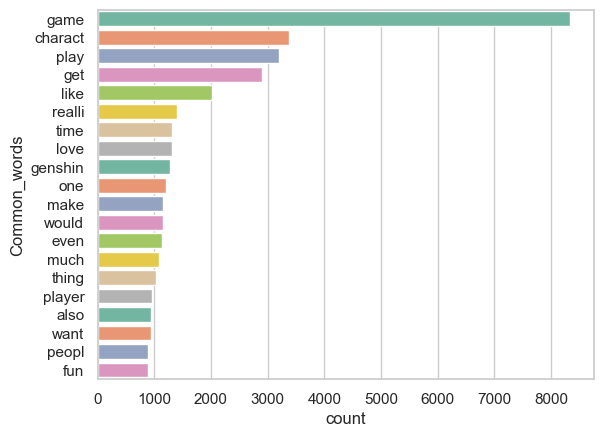

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
{'achiev': 0, 'action': 1, 'ad': 2, 'add': 3, 'anim': 4, 'anyth': 5, 'area': 6, 'bit': 7, 'boss': 8, 'break': 9, 'bunch': 10, 'caus': 11, 'charact': 12, 'chest': 13, 'collect': 14, 'differ': 15, 'earthl': 16, 'etc': 17, 'everywher': 18, 'explan': 19, 'explor': 20, 'fat': 21, 'feel': 22, 'find': 23, 'fire': 24, 'game': 25, 'genshin': 26, 'glitchi': 27, 'good': 28, 'graphic': 29, 'handl': 30, 'help': 31, 'hope': 32, 'idk': 33, 'item': 34, 'job': 35, 'kill': 36, 'kind': 37, 'level': 38, 'like': 39, 'list': 40, 'littl': 41, 'long': 42, 'love': 43, 'mani': 44, 'map': 45, 'monster': 46, 'obes': 47, 'ok': 48, 'opinion': 49, 'plenti': 50, 'power': 51, 'quest': 52, 'rare': 53, 'recommend': 54, 'relat': 55, 'say': 56, 'sometim': 57, 'sorri': 58, 'star': 59, 'teleport': 60, 'thank': 61, 'time': 62, 'updat': 63, 'upgrad': 64, 'use': 65, 'want': 66, 'water': 67, 'waypoint': 68, 'weapon': 69, 'whatev

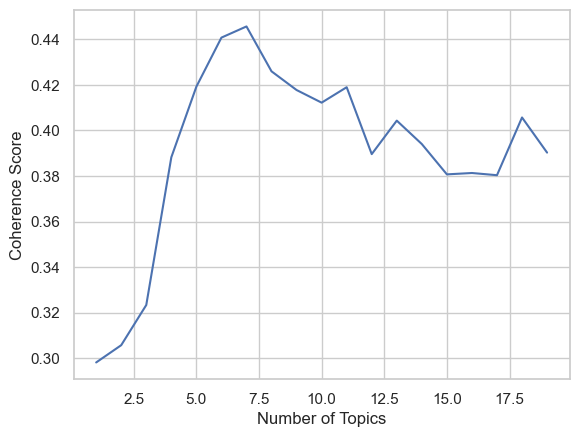

Review:  If your into anything action related or into games with quests or whatever, Genshin Is what I recommend. This game you have a whole obese map and you can explore everywhere and get teleport waypoints to always go to different areas and it's useful for quests so you can just teleport. The game is kind of like Zelda in my opinion. You can collect weapons and explore like I said and kill all kinds of monsters or bosses. You can also collect and level up characters by finding chests and making wishes. You can even upgrade your weapons and they thankfully don't break at all. The characters even have useful powers like fire or water, etc and are useful to use. And there's always updates to the game. And the graphics and animations are amazing. I wrote 4 stars though cause sometimes the game can be a little glitchy (rarely but still) and I feel there's a bit too much to it. I be having 15+ quests almost 24/7 and there's so many others they want me to find and add to the list of the f

In [5]:
%run Analysis.ipynb

In [1]:
python -m pip install tensorflow

SyntaxError: invalid syntax (840521400.py, line 1)

In [12]:
from textblob import Word, TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
#Loading the dataset


ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
#Generating Embeddings using tokenizer
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data_cleaned['verified_reviews'].values)
X = tokenizer.texts_to_sequences(data_cleaned['verified_reviews'].values)
X = pad_sequences(X)
#Model Building
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(704, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(352, activation='LeakyReLU'))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())
#Model Training
model.fit(X_train, y_train, epochs = 20, batch_size=32, verbose =1)
#Model Testing
model.evaluate(X_test,y_test)

In [ ]:
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

sentiments = [analyze_sentiment(review) for review in USreview_copy['review']]
sentiments